Software is free software released under the "GNU General Public License v3.0"

Copyright (c) 2022 Yuning-Jiang - yuning.jiang17@gmail.com

In [8]:
import pandas as pd, numpy as np
import config
import re 
from os import listdir
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec 

In [4]:
#Generate combined historical dataset using NVD reports from 2002 to 2020.
def generate_Threat_CombinedFile():
    list = listdir(config.report_threat_path)
    number_files = len(list)-1
    dict = []
    dict_of_reports = {}
    for year in range(2002,2002 + number_files):
        year_in_string = str(year)
        fileName = 'NVD_'+ year_in_string + '_ThreatLabel.csv'
        dict_of_reports[year_in_string] = []
        dict_of_reports[year_in_string] = pd.read_csv(config.report_threat_path + fileName)
        dict.append(dict_of_reports[year_in_string])
    df = pd.concat(dict, ignore_index=True)
    return df

df = generate_Threat_CombinedFile()
df = df[~df['report'].str.contains('REJECT')]
# print schema
print("Schema:\n\n",df.dtypes)
print("Number of vulnerability reports,columns=",df.shape)

Schema:

 id           object
report       object
memc          int64
bypass        int64
csrf          int64
dirtra        int64
dos           int64
execution     int64
fileinc       int64
gainpre       int64
httprs        int64
infor         int64
overflow      int64
sqli          int64
xss           int64
dtype: object
Number of vulnerability reports,columns= (150528, 15)


In [5]:
 df.sample(2)

,id,report,memc,bypass,csrf,dirtra,dos,execution,fileinc,gainpre,httprs,infor,overflow,sqli,xss
44573,CVE-2010-2951,"dns_internal.cc in Squid 3.1.6, when IPv6 DNS ...",0,0,0,0,1,0,0,0,0,0,0,0,0
152699,CVE-2020-2812,Vulnerability in the MySQL Server product of O...,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# This method calculates how many vulnerabilities that have are not assigned any threat label.
unlabelled_in_all = df[(df['memc']!=1) & (df['bypass']!=1) & (df['csrf']!=1) & 
                            (df['dirtra']!=1) & (df['dos']!=1) & (df['execution']!=1)
                      & (df['fileinc']!=1) & (df['gainpre']!=1) & (df['httprs']!=1)
                      & (df['infor']!=1) & (df['overflow']!=1) & (df['sqli']!=1)
                      & (df['xss']!=1)]
print('Percentage of unlabelled comments is ', len(unlabelled_in_all)/len(df)*100)

Percentage of unlabelled comments is  28.1070631377551


In [7]:
df['report'].fillna("unknown", inplace=True)
x=df.iloc[:,2:].sum()
#marking comments without any tags as "clean"
rowsums=df.iloc[:,2:].sum(axis=1)
df['clean']=(rowsums==0)
#count number of clean entries
df['clean'].sum()
print("Total comments = ",len(df))
print("Total clean comments = ",df['clean'].sum())
print("Total tags =",x.sum())

Total comments =  150528
Total clean comments =  42309
Total tags = 140738


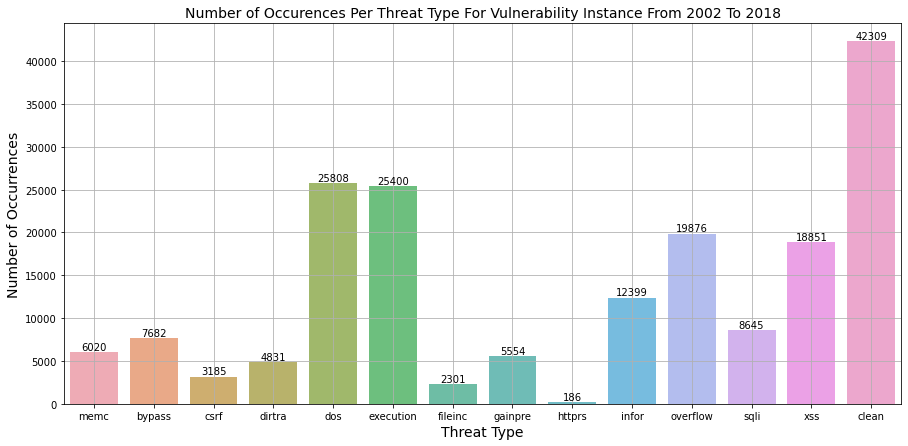

In [9]:
x=df.iloc[:,2:].sum()
#plot
fig, ax = plt.subplots(figsize=(15,7))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Number of Occurences Per Threat Type For Vulnerability Instance From 2002 To 2018", fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xlabel('Threat Type', fontsize=14)
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.grid(True)
plt.show()

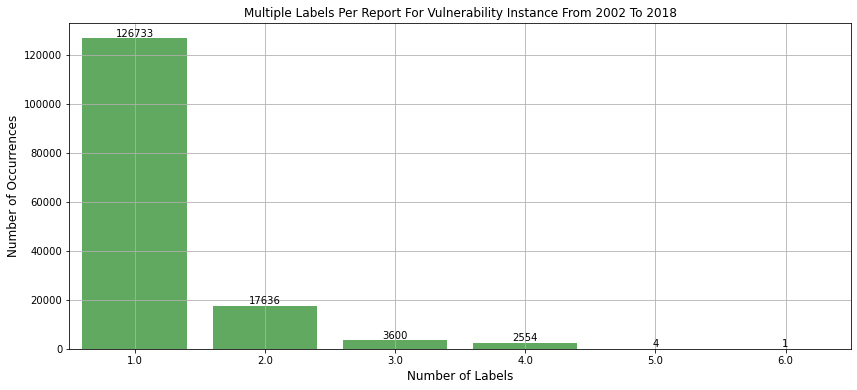

In [10]:
rowsums=df.iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()
#plot
color = sns.color_palette()
plt.figure(figsize=(14,6))
ax = sns.barplot(x.index, x.values, alpha=0.8,color=color[2])
plt.title("Multiple Labels Per Report For Vulnerability Instance From 2002 To 2018")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of Labels', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.grid(True)
plt.show()

Text(0.5, 1.05, 'Correlation of Threat features & targets')

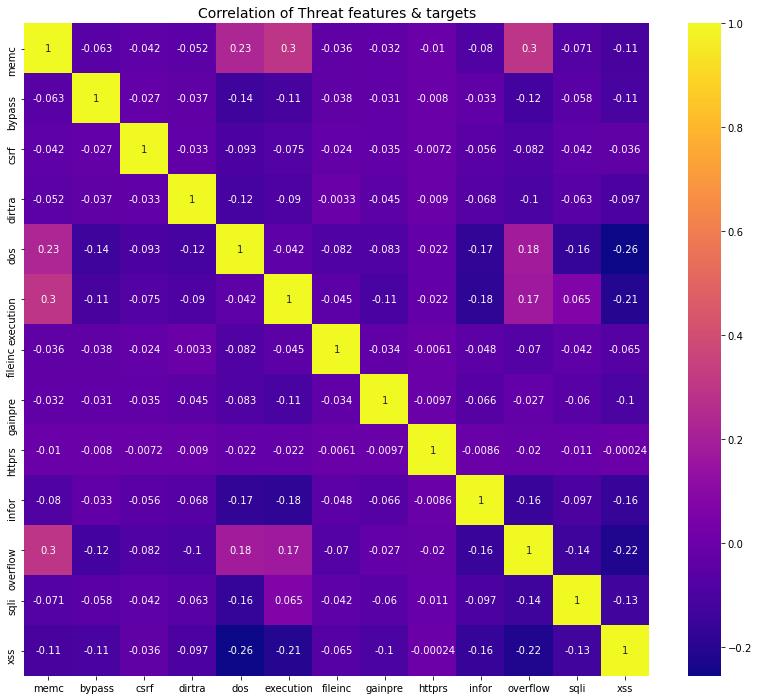

In [11]:
temp_df=df.iloc[:,2:-1]
# filter temp by removing clean comments
temp_df=temp_df[~df.clean]

corr=temp_df.corr()

colormap = plt.cm.plasma
plt.figure(figsize=(14,12))
sns.heatmap(corr,cmap=colormap,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)
plt.title('Correlation of Threat features & targets',y=1.05,size=14)